In [ ]:
#Tài liệu tham khảo: https://www.kaggle.com/code/punit0811/machine-learning-project-basic-linear-regression/notebook

In [7]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv("Ecommerce_Customers.csv") 

df = df.iloc[:,3:] #chỉ lấy các giá trị numerical
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [51]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [53]:
df.info()
#Ko có null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(sns.__version__)


0.13.2


In [ ]:
#EDA

In [59]:
#sns.pairplot(df)
#plt.show()

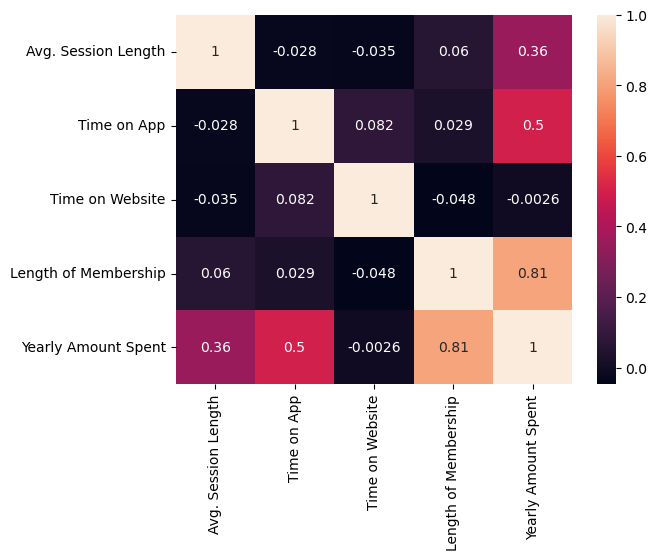

In [61]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
#3 features Length of Membership, Time on App, Avg. Session Length có correlation đáng kể với target
# Không có hiện tượng đa cộng tuyến giữa các features

In [182]:
#Chọn features, target
X = df[['Length of Membership', 'Time on App', 'Avg. Session Length']]
Y = df['Yearly Amount Spent']

In [184]:
#Chia tập train, test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state= 101)

In [186]:
#Do Min/Max chênh lệch giữa các features nên phải scale value
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#NOTE: TRONG OLS THÌ SCALE K ẢNH HƯỞNG ĐẾN PERFORMANCE/ERROR MÀ CHỈ ẢNH HƯỞNG TỚI COEFFICIENT

In [188]:
#Train model LinearRegression

In [190]:
from sklearn.linear_model import LinearRegression

In [192]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [200]:
coef = reg.coef_
print(coef)

[60.19248611 36.69255503 26.04870628]


In [196]:
#Predict data
y_prediction = reg.predict(X_test)

In [180]:
#Kiểm tra mô hình
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"MAE: {mean_absolute_error(Y_test, y_prediction)}")
print(f"RMSE: {mean_squared_error(Y_test, y_prediction)}")
print(f"R2: {r2_score(Y_test, y_prediction)}")

MAE: 7.236949056091405
RMSE: 80.19544609397668
R2: 0.9889519444377916


In [202]:
###So sánh với mô hình dùng 4 features trên kaggle: MAE và RMSE bị cao hơn => mô hình undefitting => Nên lấy cả 4 features

C:\Users\ANH THU\AppData\Local\Temp\ipykernel_19572\1134282390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test - y_prediction, bins = 50)


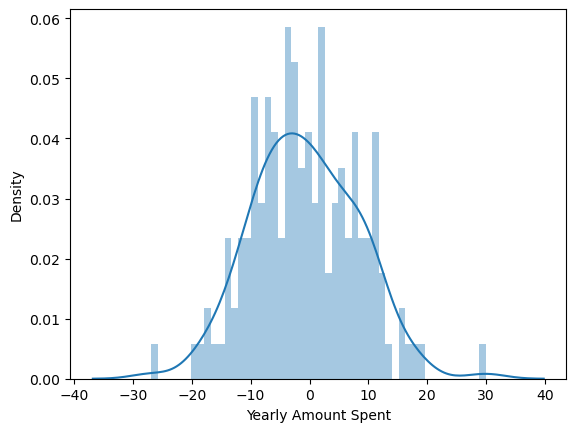

In [208]:
#Residuals
sns.distplot(Y_test - y_prediction, bins = 50)
plt.show()

#residuals follow normal distribution